---   
 <img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Department of Data Science</h1>
<h1 align="center">Course: Tools and Techniques for Data Science</h1>

---
<h3><div align="right">Instructor: Muhammad Arif Butt, Ph.D.</div></h3>    


<h1 align="center">Lecture 7.2 (Basic Text Pre-Processing)</h1>

<a href="https://colab.research.google.com/github/arifpucit/data-science/blob/master/Section-5-(Data-Acquisition)/Lec-5.4(Web-Scraping-using-Selenium-II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="center" width="900"  src="images/phase2.png"  > 

# Learning agenda of this notebook
1. **Text Cleaning**
    - Removing digits and words containing digits
    - Removing newline characters and extra spaces
    - Removing HTML tags
    - Removing URLs
    - Removing punctuations
    

2. **Basic Text Preprocessing**
    - Case folding
    - Expand contractions
    - Chat word treatment
    - Handle emojis
    - Spelling correction
    - Tokenization
    - Creating N-grams
    - Stop words Removal
 
 
3. **Advanced Preprocessing**
    - Stemming
    - Lemmatization
    - POS tagging
    - NER
    - Parsing
    - Coreference Resolution
    

4. **Text Pre-Processing on Tweets Dataset**

# Download and Install Required Libraries

In [1]:
import sys
!{sys.executable} -m pip install -q --upgrade pip
!{sys.executable} -m pip install -q --upgrade numpy pandas sklearn
!{sys.executable} -m pip install -q --upgrade nltk spacy gensim wordcloud textblob contractions clean-text unicode

# 1. Text Cleaning

## a. Removing Digits and Words Containing Digits 
- Sometimes it happens that words and digits combine are written in the text which creates a problem for machines to understand. Hence, we need to remove the words and digits which are combined like game57 or game5ts7.
- For such and many other tasks we normally use Regular Expressions.
- Watch my two videos on regular expressions:
    - https://www.youtube.com/watch?v=DhQ-kc6FPVk
    - https://www.youtube.com/watch?v=3J62z5aGTQc

- The **`re.sub(pattern, replacement_string, str)`** method return the string obtained by replacing the occurrences of `pattern` in `str` with the `replacement_string`. If the pattern isn’t found, the string is returned unchanged.

In [2]:
import re
mystr = "This is abc32 a abc32xyz string containing 32abc words  32 having digits"
re.sub('\w*\d\w*', '', mystr)

'This is  a  string containing  words   having digits'

## b. Removing New Line Characters and Extra Spaces
- Most of the time text data contain extra spaces or while removing digits more than one space is left between the text.
- We can use Python's string and re module to perform this pre-processing task.

In [3]:
import re
mystr = "      This         is a       string  with   lots of   extra spaces      in beteween    words     ."
re.sub(' +', ' ', mystr)

' This is a string with lots of extra spaces in beteween words .'

In [4]:
mystr = "This is\na string\nwith lots of new\nline characters."
print("Original String:\n", mystr)
print("Preprocessed String:", re.sub('\n', ' ', mystr))

Original String:
 This is
a string
with lots of new
line characters.
Preprocessed String: This is a string with lots of new line characters.


## c. Removing HTML Tags
- Once you get data via scraping websites, your data might contain HTML tags, which are not required as such in the data. So we need to remove them.

In [5]:
import re
mystr = "<html> <head> An empty head. </head><body><p> This is so simple and fun. </p> </body> </html>"
print("Original String: ", mystr)
print("Preprocessed String: ", re.sub('<.*?>', '', mystr))

Original String:  <html> <head> An empty head. </head><body><p> This is so simple and fun. </p> </body> </html>
Preprocessed String:    An empty head.  This is so simple and fun.   


## d. Removing URLs
- At times the text data you have some URLS, which might not be helpful in suppose sentiment analysis. So better to remove those URLS from your dataset
- Once again, we can use Python's re module to remove the URLs.

In [6]:
import re
mystr = "Good youTube lectures by Arif are available at http://www.youtube.com/c/LearnWithArif/playlists"
re.sub('https?://\S+|www.\.\S+', '', mystr)

'Good youTube lectures by Arif are available at '

## e. Removing Punctuations
- Punctuations are symbols that are used to divide written words into sentences and clauses
- Once you tokenize your text, these punctuation symbols may become part of a token, and may become a token by itself, which is not required in most of the cases
- We can use Python's `string.punctuation` constant and `replace()` method to replace any punctuation in text with an empty string

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

>- Check for other constants like `string.whitespace`, `string.printable`, `string.ascii_letters`, `string.digits` as well.

In [8]:
mystr = 'A {text} ^having$ "lot" of #s and [puncutations]!.;%..'
mystr

'A {text} ^having$ "lot" of #s and [puncutations]!.;%..'

In [9]:
newstr = ''.join([ch for ch in mystr if ch not in string.punctuation])
newstr

'A text having lot of s and puncutations'

# 2. Basic Text Preprocessing

## a. Case Folding 
- The text we need to process may come in lower, upper, sentence, camel cases
- If the text is in the same case, it is easy for a machine to interpret the words because the lower case and upper case are treated differently by the machine
- In applications like Information Retrieval, we reduce all letters to lower case
- In applications like sentiment analysis, machine translation and information extraction, keeping the case might be helpful. For example US vs us.

In [10]:
mystr = "This IS GREAT series of Lectures by Arif at the Deaprtment of DS"
mystr.lower()

'this is great series of lectures by arif at the deaprtment of ds'

## b. Expand Contractions
- Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.
- Examples:
    - you're ---> you are
    - ain't ---> am not / are not / is not / has not / have not
    - you'll ---> you shall / you will
    - wouldn't 've ---> would not haveyou are
- In order to expand contractions, you can install and use the `contractions` module or can create your own dictionary to expand contractions

In [11]:
import sys
!{sys.executable} -m pip install -q  contractions

In [12]:
import contractions
print(contractions.fix("you're"))      # you are
print(contractions.fix("ain't"))       # am not / are not / is not / has not / have not
print(contractions.fix("you'll"))      #you shall / you will
print(contractions.fix("wouldn't've")) #"wouldn't've": "would not have",

you are
are not
you will
would not have


In [13]:
mystr = '''I'll be there within 5 min. Shouldn't you be there too? I'd love to see u there my dear. 
It's awesome to meet new friends. We've been waiting for this day for so long.'''
mystr

"I'll be there within 5 min. Shouldn't you be there too? I'd love to see u there my dear. \nIt's awesome to meet new friends. We've been waiting for this day for so long."

In [14]:
# use loop
mylist = []   
for word in mystr.split(sep=' '):
    mylist.append(contractions.fix(word))

newstring = ' '.join(mylist)
print(newstring)

I will be there within 5 min. Should not you be there too? I would love to see you there my dear. 
It is awesome to meet new friends. We have been waiting for this day for so long.


In [15]:
# use list comprehension and join the words of list on space
expanded_string = ' '.join([contractions.fix(word) for word in mystr.split()])
expanded_string

'I will be there within 5 min. Should not you be there too? I would love to see you there my dear. It is awesome to meet new friends. We have been waiting for this day for so long.'

## c. Chat Word Treatment
- Some commonly used abbreviated chat words that are used on social media these days are:
    - GN for good night
    - fyi for for your information
    - asap for as soon as possible
    - yolo for you only live once
    - rofl for rolling on floor laughing
    - nvm for never mind
    - ofc for ofcourse

- To pre-process any text containing such abbreviations we can search for an online dictionary, or can create a dictionary of our own

In [16]:
dict_chatwords = { 
    'ack': 'acknowledge',
    'omg': 'oh my God',
    'aisi': 'as i see it',
    'bi5': 'back in 5 minutes',
    'lmk': 'let me know',
    'gn' : 'good night',
    'fyi': 'for your information',
    'asap': 'as soon as possible',
    'yolo': 'you only live once',
    'rofl': 'rolling on floor laughing',
    'nvm': 'never ming',
    'ofc': 'ofcourse',
    'blv' : 'boulevard',
    'cir' : 'circle',
    'hwy' : 'highway',
    'ln' : 'lane',
    'pt' : 'point',
    'rd' : 'road',
    'sq' : 'square',
    'st' : 'street'
    }

In [17]:
mystr = "omg this is aisi I ack your work and will be bi5"
mystr

'omg this is aisi I ack your work and will be bi5'

In [18]:
# dict.items() method returns all the key-value pairs of a dict as a two object tuple
# dict.keys() method returns all the keys  of a dict object
# dict.values() method returns all the values  of a dict object
mylist = []   
for word in mystr.split(sep=' '):
    if word in dict_chatwords.keys():
        mylist.append(dict_chatwords[word])
    else:
        mylist.append(word)
newstring = ' '.join(mylist)
print(newstring)

oh my God this is as i see it I acknowledge your work and will be back in 5 minutes


## d. Handle Emojis
- We come across lots and lots of emojis while scraping comments/posts from social media websites like Facebook, Instagram, Whatsapp, Twitter, LinkedIn, which needs to be removed from text.
- Machine Learrning algorithm cannot understand emojis, so we have two options:
    - Simply remove the emojis from the text data, and this can be done using `clean-text` library
    - Replace the emoji with its meaning happy, sad, angry,....


### (i) Remove Emojis

In [19]:
mystr = "These emojis needs to be removed, there is a huge list...😃😬😂😅😇😉😊😜😎🤗🙄🤔😡😤😭🤠🤡🤫💩😈👻🙌👍✌️👌🙏"
mystr

'These emojis needs to be removed, there is a huge list...😃😬😂😅😇😉😊😜😎🤗🙄🤔😡😤😭🤠🤡🤫💩😈👻🙌👍✌️👌🙏'

In [20]:
import re
 
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # code range for emoticons
        u"\U0001F300-\U0001F5FF"  # code range for symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # code range for transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # code range for flags (iOS)
        u"\U00002700-\U000027BF"  # code range for Dingbats
        u"\U00002500-\U00002BEF"  # code range for chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f" 
        u"\u3030"
        "]+", flags=re.UNICODE)

print(emoji_pattern.sub(r'', mystr)) # no emoji


These emojis needs to be removed, there is a huge list...


### (ii) Replace Emojis with their Meanings

In [21]:
import sys
!{sys.executable} -m pip install -q  emoji

In [22]:
import emoji
mystr = "This is  👍"
emoji.demojize(mystr)

'This is  :thumbs_up:'

In [23]:
mystr = "I am 🤔"
emoji.demojize(mystr)

'I am :thinking_face:'

In [24]:
mystr = "This is  👍"
emoji.replace_emoji(mystr, replace='positive')

'This is  positive'

## e. Spelling Correction
- Most of the times the text data you have contain spelling errors, which if not corrected the same word may be represented in two or may be more different ways.
- Almost all word editors, today underline incorrectly typed words and provide you possible correct options
- So spelling correction is a two step task:
    - Detection of spelling errors
    - Correction of spelling errors
        - Autocorrect as you type space
        - Suggest a single correct word
        - Suggest a list of words (from which you can choose one)
- Types of spelling errors:
    - **Non-word Errors:** are non-dictionary words or words that do not exist in the language dictionary. For example instead of typing `reading` the user typed `reeding`. These are easy to detect as they do not exist in the language dictionary and can be corrected using algorithms like shortest weighted edit distance and highest noisy channel probability.
    - **Real-word Errors:** are dictionary words and are hard to detect. These can be of two types:
        - Typographical errors: For example instead of typing `great` the user typed `greet`
        - Cognitive errors (homophones: For example instead of typing `two` the user typed `too`


<h2 align="left" style="font-family:'Arial'">"I am reeding thiss gret boook on deta sciance suject, which is a greet curse"</h2>

In [25]:
import sys
!{sys.executable} -m pip install -q  textblob

In [26]:
import textblob
textblob.__version__

'0.17.1'

In [27]:
from textblob import TextBlob
mystr = "I am reeding thiss gret boook on deta sciance suject, which is a greet curse"
blob = TextBlob(mystr)
type(blob)

textblob.blob.TextBlob

In [28]:
print(dir(blob))

['__add__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cmpkey', '_compare', '_create_sentence_objects', '_strkey', 'analyzer', 'classifier', 'classify', 'correct', 'detect_language', 'ends_with', 'endswith', 'find', 'format', 'index', 'join', 'json', 'lower', 'ngrams', 'noun_phrases', 'np_counts', 'np_extractor', 'parse', 'parser', 'polarity', 'pos_tagger', 'pos_tags', 'raw', 'raw_sentences', 'replace', 'rfind', 'rindex', 'sentences', 'sentiment', 'sentiment_assessments', 'serialized', 'split', 'starts_with', 'startswith', 'string', 'strip', 'stripped', 'subjectivity', 'tags', 'title', 'to_json', 'tokenize', 'tokenizer', 'tokens', 'tra

In [29]:
blob.correct().string

'I am reading this great book on data science subject, which is a greet curse'

>-  The non-word errors like `reeding`, `this`, `gret`, `boook`, `deta`, `sciance` and `suject` have been corrected by `blob.correct()` method
>- However, the real word errors like `greet` and `curse` are not corrected

**Let us try to understand how `textblob.correct()` method do this?**

In [30]:
# The word attribute of textblob object returns list of words in the text
blob.words

WordList(['I', 'am', 'reeding', 'thiss', 'gret', 'boook', 'on', 'deta', 'sciance', 'suject', 'which', 'is', 'a', 'greet', 'curse'])

In [31]:
# Word.spellcheck() method returns a list of (word, confidence) tuples with spelling suggestions
# 'reeding'
blob.words[2].spellcheck()

[('reading', 0.7651006711409396),
 ('feeding', 0.10067114093959731),
 ('heeding', 0.053691275167785234),
 ('rending', 0.026845637583892617),
 ('breeding', 0.026845637583892617),
 ('receding', 0.013422818791946308),
 ('reeling', 0.006711409395973154),
 ('needing', 0.006711409395973154)]

In [32]:
# Word.spellcheck() method returns a list of (word, confidence) tuples with spelling suggestions
# 'boook'
blob.words[5].spellcheck()

[('book', 0.946969696969697), ('brook', 0.05303030303030303)]

In [33]:
# Word.spellcheck() method returns a list of (word, confidence) tuples with spelling suggestions
# 'greet'
blob.words[13].spellcheck()

[('greet', 1.0)]

## f. Tokenize Text

<img align=right src="images/tokenization.png" width="500">

- **What is Tokenization:** Tokenization is a process of splitting text into meaningful segments called tokens. It can be character level, subword level, word level (unigram), two word level (bigram), three word level (trigram), and sentence level.
- **Why to do Tokenization:** For classification of a product review as positive or negative, we may need to count the number of positive words and compare them with the count of negative words in the text of that review. For this we first need to tokenize the text of the product review. Tokens are the basic uilding locks of a document oject. Everything that helps us understand the meaning of the text is derived from tokens and their relationship to one another.
- **How to do Tokenization:** In a sentence you may come across following four items:
    -  **Prefix**:	Character(s) at the beginning &#9656; `( “ $ Rs Dr`
    -  **Suffix**:	Character(s) at the end &#9656; `km ) , . ! ”`
    -  **Infix**:	Character(s) in between &#9656; `- -- / ...`
    -  **Exception**: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied. From `L.A.!` the exclamation mark (!) is separated, while `L.A.` is not split

### (i) Tokenization with `string.split()` Method
- The easiest way to tokenize is to use the `mystr.split()` method, which returns a list of strings.
- The `mystr.split()` method splits a string into a list of strings at every occurrence of space character by default and discard empty strings from the result.
- You may pass a parameter `sep='i'` to split method to split at that specific character instead.
- It's limitation is that it do not  consider punctuation symbols as a separate token

In [34]:
mystr="Learning is fun with Arif" 
print(mystr.split())

['Learning', 'is', 'fun', 'with', 'Arif']


In [35]:
mystr="This example is great!" 
print(mystr.split())

['This', 'example', 'is', 'great!']


> <font color=green> Observe the output, the exclamation symbol has become part of the token great (which is wrong)

### (ii) Tokenization with `re.split()` Method
- The `re.split()` method splits the source string by the occurrences of the pattern, returning a list containing the resulting substrings.

In [36]:
import re
mystr="This example is great!" 
pattern = re.compile(r'\W+')
pattern.split(mystr)

['This', 'example', 'is', 'great', '']

>- <font color=green> The exclamation symbol is not part of the token great, but what if I need that symbol as a separate token?
>- <font color=green> Moreover, you need to write different regular expression for different scenarios

### (iii) Tokenization using NLTK
- NLTK stands for Natural Language Toolkit (https://www.nltk.org/). This is a suite of libraries and programs for statistical natural language processing for English language
- NLTK was released in 2001, and is available for Windows, Mac OS X, and Linux.. 
- NLTK provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.
- NLTK fully supports the English language, but others like Spanish or French are not supported as extensively.
- It is a string processing libbrary, i.e., you give a string as input and get a string as output
- There are. different tokenizer available in nltk:
    - `nltk.tokenize.sent_tokenize(str)` for sentence tokenization
    - `nltk.tokenize.word_tokenize(str)` for word tokenization
    - `nltk.tokenize.treebank.TreebankWordTokenizer(str)`

In [37]:
import sys
!{sys.executable} -m pip install -q nltk

In [38]:
import nltk
nltk.__version__

'3.7'

In [39]:
from nltk.tokenize import word_tokenize, sent_tokenize
mystr="This example is great!" 
print(word_tokenize(mystr))

['This', 'example', 'is', 'great', '!']


> <font color=green> Observe the output, this time the exclamation symbol is kept as a separate tokens.

In [40]:
mystr="You should do your Ph.D in A.I!" 
print(word_tokenize(mystr))

['You', 'should', 'do', 'your', 'Ph.D', 'in', 'A.I', '!']


In [41]:
mystr="You should've sent me an email at arif@pucit.edu.pk or vist http://www/arifbutt.me"
print(word_tokenize(mystr))

['You', 'should', "'ve", 'sent', 'me', 'an', 'email', 'at', 'arif', '@', 'pucit.edu.pk', 'or', 'vist', 'http', ':', '//www/arifbutt.me']


In [42]:
mystr="Here's an example worth $100. I am 384400km away from earth's moon!" 
print(word_tokenize(mystr))

['Here', "'s", 'an', 'example', 'worth', '$', '100', '.', 'I', 'am', '384400km', 'away', 'from', 'earth', "'s", 'moon', '!']


### (iv) Tokenization with spaCy
- **spaCy** (https://spacy.io/) is an open-source Natural Language Processing library designed to handle NLP tasks with the most efficient and state of the art algorithm, released in 2015. 
- Spacy support many languages (over 65) where you can perform tokenizing, however, for this other than importing spacy, you have to load the appropriate library using spacy.load() method. But before that make sure you have downloaded the model in your system.
- spaCy will isolate punctuation that does *not* form an integral part of a word. Quotation marks, commas, and punctuation at the end of a sentence will be assigned their own token. However, punctuation that exists as part of an email address, website or numerical value will be kept as part of the token.

- **Download spacy model for English language**
    - Spacy comes with pretrained models and pipelines for different languages.
    - You can download any of the following models for English language, but better to download the small as this will require a reasonable amount of space on your disk, and may take a bit of time to download:
        - en_core_web_sm
        - en_core_web_md
        - en_core_web_lg
        - en_core_web_trf
    - The model name consist of four parts:
        - Language (en): The language abreviation can be `en` for English, `fr` for French, `zh` for Chinese
        - Type (core/dep): It can be core for general-purpose pipeline with tagging, parsing, lemmatization and NER recognition. It can be dep for only tagging, parsing and lemmatization
        - Genre (web/news): It measn the type of text the pipeline is trained on, e.g., web or news. 
        - Size: Package size indicator. `sm` for small, `md` for medium, `lg` for large and `trf for transformer
        - Package version (a.b.c): Here a is the major version for spaCy, b is the minor version for spaCy, while c is the model verion dependent to the data on which the model is trained, it parameters, number of iterations and different vectors.
        
> For details read spaCy101: https://spacy.io/usage/spacy-101

In [43]:
import sys
!{sys.executable} -m pip install -q spacy

In [44]:
import spacy
spacy.__version__

/Users/arif/opt/anaconda3/envs/python10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'3.4.1'

**Download spacy model for English language**

In [45]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [46]:
import sys
!{sys.executable} -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 6.1 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


**Example 1:**

In [2]:
# import spacy and load the language library
import spacy
nlp = spacy.load('en_core_web_lg')

mystr="'A 7km Uber cab ride from Gulberg to Joher Town will cost you $20" 
doc = nlp(mystr)

for token in doc:
    print(token, end=' , ')

' , A , 7 , km , Uber , cab , ride , from , Gulberg , to , Joher , Town , will , cost , you , $ , 20 , 

> <font color=green> Note that spacy has successfully tokenized the distance symbol, which nltk failed to separate.</font>

**Example 2:**

In [48]:
# import spacy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

mystr="You should've sent me an email at arif@pucit.edu.pk or vist http://www/arifbutt.me"
doc = nlp(mystr)

for token in doc:
    print(token, end=' , ')

You , should , 've , sent , me , an , email , at , arif@pucit.edu.pk , or , vist , http://www , / , arifbutt.me , 

>- <font color=green> Note that spacy has kept the email as a single token, while nltk separated it.</font>
>- <font color=green> However, spacy also failed to properly tokenize the URL :(</font>

**Additional Token Attributes:** Once the string is passed to `nlp()` method of spacy, the tokens of the resulting `doc` object has many other associated attributes other than just tokens:

|Tag|Description
|:------|:------:
|`.text`|The original word text
|`.lemma_`|The base form of the word
|`.pos_`|The simple part-of-speech tag
|`.tag_`|The detailed part-of-speech tag
|`.shape_`|The word shape – capitalization, punctuation, digits
|`.is_alpha`, `is_ascii`, `is_digit`|Token text consists of alphanumeric characters, ASCII characters, digits
|`.is_lower`, `is_upper`, `is_title`|Token text is in lowercase, uppercase, titlecase
|`.is_punct`, `is_space`, `is_stop`|Token is punctuation, whitespace, stopword

## g. Creating N-grams
- **What are n-grams?** 
    - A sequence of n words, can be bigram, trigram,....
- **Why to use n-grams?** 
    - Capture contextual information (`good food` carries more meaning than just `good` and `food` when observed independently)
    - Applications of N-grams:
        - Sentence Completion
        - Auto Spell Check and correction
        - Auto Grammer Check and correction
    - Is there a perfect value of n?
        - Different types of n-grams are suitable for different types of applications. You should try different n-grams on your data in order to confidently conclude which one works the best among all for your text analysis. 

- **How to create n-grams?** 

In [49]:
import nltk
mystr = "Allama Iqbal was a visionary philosopher and politician. Thank you"
tokens = nltk.tokenize.word_tokenize(mystr)
bgs = nltk.bigrams(tokens)
print(bgs)
for grams in bgs:
    print(grams)

<generator object bigrams at 0x7fd61bb02f10>
('Allama', 'Iqbal')
('Iqbal', 'was')
('was', 'a')
('a', 'visionary')
('visionary', 'philosopher')
('philosopher', 'and')
('and', 'politician')
('politician', '.')
('.', 'Thank')
('Thank', 'you')


>- The formula to calculate the count of n-grams in a document is: **`X - N + 1`**, where `X` is the number of words in a given document and `N` is the number of words in n-gram
\begin{equation}
    \text{Count of N-grams} \hspace{0.5cm} = \hspace{0.5cm} 11 - 2 + 1 \hspace{0.5cm} = \hspace{0.5cm} 10
\end{equation}


In [50]:
tgs = nltk.trigrams(tokens)
for grams in tgs:
    print(grams)

('Allama', 'Iqbal', 'was')
('Iqbal', 'was', 'a')
('was', 'a', 'visionary')
('a', 'visionary', 'philosopher')
('visionary', 'philosopher', 'and')
('philosopher', 'and', 'politician')
('and', 'politician', '.')
('politician', '.', 'Thank')
('.', 'Thank', 'you')


\begin{equation}
    \text{Count of N-grams} \hspace{0.5cm} = \hspace{0.5cm} 11 - 3 + 1 \hspace{0.5cm} = \hspace{0.5cm} 9
\end{equation}


In [51]:
ngrams = nltk.ngrams(tokens, 4)
for grams in ngrams:
    print(grams)

('Allama', 'Iqbal', 'was', 'a')
('Iqbal', 'was', 'a', 'visionary')
('was', 'a', 'visionary', 'philosopher')
('a', 'visionary', 'philosopher', 'and')
('visionary', 'philosopher', 'and', 'politician')
('philosopher', 'and', 'politician', '.')
('and', 'politician', '.', 'Thank')
('politician', '.', 'Thank', 'you')


## h.  Stopwords Removal
- Stopwords are extremely common words of a language having very little meanings, and it is usually safe to remove them and not consider them as important for later processing of our data.
- Every language has its own set of stopwords. For example, some stopwords of English language are: the, a, an, was, were, at, will, on, in, from, to, me, you, yours,....
- Whether you should remove stop words from your text or not mainly depends on the problem you are solving.
- Remove stop words from your text if you are working on:
    - Text Classification (Spam Filtering, Language Classification, Genre Classification)
    - Caption Generation
    - Auto-Tag Generation
- Avoid removing stop words from your text if you are working on:
    - Machine Translation
    - Language Modeling
    - Text Summarization
    - Question-Answering problems

### (i) Using NLTK
- The NLTK library has a defined set of stopwords for different languages like English. Here, we will focus on ‘english’ stopwords. One can also consider additional stopwords if required
- Note that there is no single universal list of stopwords. The list of the stop words can change depending on your problem statement
- Once you install nltk, it just install the base library and do not install all the packages related to different languages, different tokenization schemes, etc. To install all the nltk packages and corpora use `nltk.download()`
- An installation window will pop up. Select all and click ‘Download’ to download and install the additional bundles. This will download all the dictionaries and other language and grammar data frames necessary for full NLTK functionality.

In [52]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [53]:
import nltk
nltk.download("stopwords")
# nltk.download()

[nltk_data] Downloading package stopwords to /Users/arif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

> After completion of downloading, you can load the package of `stopwords` from the `nltk.corpus` and use it to load the stop words

In [54]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'has', 'here', 'doesn', "hasn't", 'mustn', 'further', "shan't", 'for', "needn't", 'not', 'than', 'am', 'isn', 'our', 'been', 'with', 'through', 'now', 'ourselves', 'themselves', 'these', 'from', 'its', "that'll", 'how', 'until', 'who', 'both', 'couldn', 'then', "you've", 'ma', 'wasn', 'of', 'same', "doesn't", 'don', "it's", 'in', 've', 'very', 'himself', 'again', 'on', 'them', 'there', 'because', "you're", 'wouldn', 'some', 'too', 'hadn', 'the', 'just', 'are', "hadn't", 'to', 'had', 'when', 'needn', 'other', 'hers', 'be', "shouldn't", 'mightn', "won't", 'whom', 'own', 'should', 'after', 'yours', 'being', 'as', 'nor', 'down', 'more', 'before', "mustn't", 'it', "wouldn't", 'will', 'were', "don't", "weren't", 'myself', 'we', 'yourself', 'doing', 're', 'few', 'aren', "haven't", 'weren', 'he', 'by', 'at', 'didn', "mightn't", 'him', 'was', "didn't", "you'll", 'why', 'against', 'any', 'you', "she's", 'her', 'does', "isn't", 'can', 'those', 'herself', 'll', 'so', 'she', 'an', 'ain', "couldn't

In [55]:
def remove_stopwords(text):
    new_text = list()
    for word in text.split():
        if word not in stopwords.words('english'):
            new_text.append(word)
    return " ".join(new_text)

**Removing Stopwords from Text of an Email**

In [56]:
import nltk
from nltk.corpus import stopwords

mystr="Your Google account has been compromised. \
    Your account will be closed. Immediately click this link to update your account"
remove_stopwords(mystr)

'Your Google account compromised. Your account closed. Immediately click link update account'

**Removing Stopwords for a Sentiment Analysis Application**

In [57]:
mystr="This movie is not good"
remove_stopwords(mystr)

'This movie good'

>- <font color=green>For sentiment analysis purposes, the overall meaning of the resulting sentence is positive, which is not at all the reality. So either do not remove sentiment analysis while doing sentiment analysis or handle the negation before removing stopwords 

### (ii) Using spaCy
- **spaCy** (https://spacy.io/) is an open-source Natural Language Processing library designed to handle NLP tasks with the most efficient and state of the art algorithm, released in 2015. 
- Spacy support many languages (over 65) where you can perform tokenizing, however, for this other than importing spacy, you have to load the appropriate library using spacy.load() method. But before that make sure you have downloaded the model in your system.
- **Download spacy model for English language:** Spacy comes with pretrained models and pipelines for different languages. We have already downloaded the pre-trained spacy model for English language
> For details read spaCy101: https://spacy.io/usage/spacy-101

In [58]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [59]:
# returns a set of around 326 English stopwords built into spaCy
print(len(nlp.Defaults.stop_words))
print(nlp.Defaults.stop_words)

326
{'n‘t', 'whereas', 'yet', "'d", 'than', 'anyone', 'am', 'still', 'with', 'afterwards', 'anywhere', 'these', 'hence', 'hereupon', 'namely', 'else', 'get', 'using', "n't", 'fifty', 'five', 'same', 'please', "'re", '’ll', 'herein', 'since', 'empty', 'there', 'move', 'the', 'forty', 'hers', 'although', 'yours', 'third', 'though', 'sometimes', 'were', 'six', 'could', 'yourself', 'ever', 'him', 'against', 'seem', 'herself', 'so', 'every', '‘re', 'somehow', 'where', 'also', 'amount', 'do', 'most', 'have', 'us', 'whenever', 'otherwise', 'never', 'former', 'next', 'out', 'become', 'formerly', 'or', 'make', 'into', 'but', 'beforehand', 'perhaps', 'each', 'has', 'bottom', 'ca', 'latterly', 'eight', "'ve", 'further', 'through', 'many', 'from', 'wherever', 'until', 'both', 'whereafter', 'must', 'then', 'however', 'of', 'mine', 'onto', 'anyway', 'on', 'back', 'cannot', 'ten', 'some', 'too', 'regarding', 'name', 'just', '‘ll', 'are', 'when', 'other', 'three', 'be', 'would', 'towards', 'noone', 'w

In [60]:
def remove_stopwords_spacy(text):
    new_text = list()
    for word in text.split():
        if word not in nlp.Defaults.stop_words:
            new_text.append(word)
    return " ".join(new_text)

In [61]:
mystr="This is a sample text and we need to remove stopwords from it"
remove_stopwords_spacy(mystr)

'This sample text need remove stopwords'

**Add a stop word to the existing list of spaCy:**

In [62]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('aka')

# Set the stop_word tag on the lexeme
nlp.vocab['aka'].is_stop = True

In [63]:
nlp.vocab['aka'].is_stop

True

In [64]:
len(nlp.Defaults.stop_words)

327

**To remove a stop word:** Alternatively, you may decide that `'always'` should not be considered a stop word.

In [65]:
nlp.vocab['aka'].is_stop

True

In [66]:
# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('aka')

# Remove the stop_word tag from the lexeme
nlp.vocab['aka'].is_stop = False

In [67]:
nlp.vocab['aka'].is_stop

False

In [68]:
len(nlp.Defaults.stop_words)

326

# 3. Text Pre-Processing on IMDB Dataset
- Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

## a. EDA on IMD Dataset

In [69]:
import pandas as pd
df = pd.read_csv("./datasets/imdb-dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [71]:
# Check the count of positive and negative reviews to ensure that the dataset is balanced
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

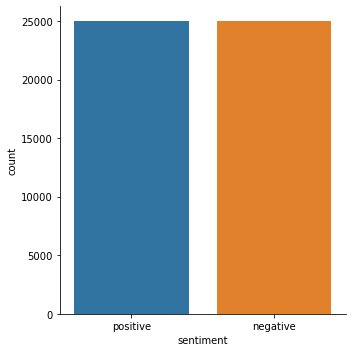

In [72]:
import seaborn as sns
sns.catplot(x ='sentiment', kind='count', data = df);

**Reduce the records from 50K to 1K for quick processing**

In [73]:
# save 1000 rows in a new dataframe
temp_df = df.iloc[0:1000,:]
temp_df.shape

(1000, 2)

In [74]:
# check out the count of positive and negative reviews
temp_df['sentiment'].value_counts()

positive    501
negative    499
Name: sentiment, dtype: int64

In [75]:
# save the dataframe to a new csv file
temp_df.to_csv('datasets/imdb-dataset-1000.csv', index=False)

## b. Case folding, removing digits, punctuations and substituting contractions

**Read the Dataset:**

In [1]:
import pandas as pd
df = pd.read_csv("./datasets/imdb-dataset-1000.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive
996,I hated it. I hate self-aware pretentious inan...,negative
997,I usually try to be professional and construct...,negative
998,If you like me is going to see this in a film ...,negative


In [2]:
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [3]:
import re
import string
import contractions
from textblob import TextBlob

def text_cleaning(mystr):
    mystr = mystr.lower()     # case folding
    mystr = re.sub('\w*\d\w*', '', mystr) # removing digits
    mystr = re.sub('\n', ' ', mystr)      # replace new line characters with space
    mystr = re.sub('[‘’“”…]', '', mystr) # removing double quotes and single quotes
    mystr = re.sub('<.*?>', '', mystr)   # removing html tags 
    mystr = re.sub('https?://\S+|www.\.\S+', '', mystr) # removing URLs
    mystr = ''.join([c for c in mystr if c not in string.punctuation])  # remove punctuations
    mystr = ' '.join([contractions.fix(word) for word in mystr.split()]) # expand contractions
    return mystr

In [4]:
df['r_cleaned'] = df['review'].apply(lambda x : text_cleaning(x))
df.head()

,review,sentiment,r_cleaned
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


## b. Tokenization

In [5]:
from nltk.tokenize import word_tokenize
df['r_tokenized'] = df['r_cleaned'].apply(lambda x: word_tokenize(x))
df.head()

,review,sentiment,r_cleaned,r_tokenized
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,basically there is a family where a little boy...,"[basically, there, is, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


## c. Remove Stop Words

In [6]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_text):
    new_words = [word for word in tokenized_text if word not in stop_words]
    return new_words

df['r_no_sw'] = df['r_tokenized'].apply(lambda token: remove_stopwords(token))
df.head()

,review,sentiment,r_cleaned,r_tokenized,r_no_sw
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,basically there is a family where a little boy...,"[basically, there, is, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,..."


## d. Save the Pre-Processed Dataframe in a New CSV File

In [7]:
# join the tokens of pre-processed text
df['processed_reviews'] = df['r_no_sw'].apply(lambda x: ' '.join(x))

new_df = pd.concat([df['sentiment'], df['processed_reviews']], axis=1)

# save the resulting datafrrame to a new csv file
new_df.to_csv('datasets/processed_imdb_reviews.csv', index=False)
new_df.head()

,sentiment,processed_reviews
0,positive,one reviewers mentioned watching oz episode ho...
1,positive,wonderful little production filming technique ...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically family little boy jake thinks zombie...
4,positive,petter matteis love time money visually stunni...
